## Data Preprocessing

In [2]:
import os 
import shutil
from sklearn.model_selection import train_test_split

### Train/Val/Test Split

In [11]:
def split_dataset(src_dir, dest_dir, train_ratio=0.7, val_ratio=0.15, test_ratio=0.15):
    
    if not os.path.exists(dest_dir):
        os.makedirs(dest_dir)
        
    for class_name in os.listdir(src_dir):
        if (class_name == ".DS_Store"):
            continue
        class_path = os.path.join(src_dir, class_name)
        print(class_path)
        images = os.listdir(class_path)
        train_files, temp = train_test_split(images, train_size=train_ratio, random_state=42)
        val_files, test_files = train_test_split(temp, test_size=test_ratio/(val_ratio + test_ratio), random_state=42)
        
        for split_name, file_list in zip(["train", "val", "test"], [train_files, val_files, test_files]):
                split_dir = os.path.join(dest_dir, split_name, class_name)
                os.makedirs(split_dir, exist_ok=True)
                for file in file_list:
                    src_file = os.path.join(class_path, file)
                    dst_file = os.path.join(split_dir, file)
                    shutil.copy(src_file, dst_file)

dataset_path = os.path.abspath(os.path.join(os.getcwd(), os.pardir, 'data', 'raw', 'dataset-resized'))
split_dataset(dataset_path, os.path.abspath(os.path.join(dataset_path, os.pardir)))

/Users/neecat/Desktop/Projects/trash-classification/data/raw/dataset-resized/paper
/Users/neecat/Desktop/Projects/trash-classification/data/raw/dataset-resized/metal
/Users/neecat/Desktop/Projects/trash-classification/data/raw/dataset-resized/cardboard
/Users/neecat/Desktop/Projects/trash-classification/data/raw/dataset-resized/trash
/Users/neecat/Desktop/Projects/trash-classification/data/raw/dataset-resized/glass
/Users/neecat/Desktop/Projects/trash-classification/data/raw/dataset-resized/plastic


### Transformations & Augmentation 

In [12]:
import torchvision.transforms as transforms

In [13]:
train_transforms = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2),
    transforms.ToTensor(),
    transforms.Normalize([0.5]*3, [0.5]*3) # [0.5]*3 creates a list for RGB channels, first argument is for mean, second for std. This scales the input from [0,1] to [-1,1]
])

val_test_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.5]*3, [0.5]*3)
])

### Load Preprocessed Data

In [20]:
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader

train_dataset = ImageFolder(root='/Users/neecat/Desktop/Projects/trash-classification/data/train', transform=train_transforms)
val_dataset = ImageFolder(root='/Users/neecat/Desktop/Projects/trash-classification/data/val', transform=val_test_transforms)
test_dataset = ImageFolder(root='/Users/neecat/Desktop/Projects/trash-classification/data/test', transform=val_test_transforms)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32)
test_loader = DataLoader(test_dataset, batch_size=32)

class_names = train_dataset.classes
print("Classes:", class_names)

Classes: ['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']


### Check the Transformed Images

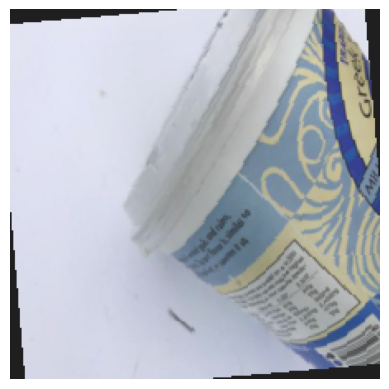

In [21]:
import matplotlib.pyplot as plt
import numpy as np

def imshow(img):
    img = img.numpy().transpose((1, 2, 0))
    img = img * 0.5 + 0.5  # here we unnormalize
    plt.imshow(img)
    plt.axis('off')
    plt.show()

dataiter = iter(train_loader)
images, labels = next(dataiter)
imshow(images[0])
